# Exercises for lesson 2

Note: you should go through those exercises once you've listen to lesson 2 and run the notebook lesson2-download and understood what was in there. This notebook is intended as a test of understanding

# Task 1 create/download a new dataset

In [21]:
# Here, you can either follow the "lesson2-dowload" notebook to create your own dataset, 
# or find good datasets online 

# Your goal will be to set up the files correctly into folders 
# so that you can easily create a ImageDataBunch using the folders you've put in place

# Note that you can use linux commands in jupyter notebook using the following:

In [22]:
%%bash 
ls

Lesson1-exercices.ipynb
Lesson2 exercises.ipynb
README.md
train


if you don't have any idea what to classify, you could try:
* man vs woman
* old vs young
* police vs firefighters vehicles
* emergency vehicles vs normal vehicles
* comics vs anime
* recognizing simpsons characters
* wine bottles vs beer bottles


In [23]:
# make your imports ;)



In [41]:
# Use python posixpath library, which is imported when you import fastai ;)

path =  # Insert the path towards your datasets here:

assert type(path) == pathlib.PosixPath, 'you didnt use the pathlib library'
assert pathlib.PosixPath('train') in path.ls(), 'you need a train folder'
assert pathlib.PosixPath('valid') in path.ls(), 'you need a validation folder'

In [ ]:
# Once you are done, you can present what you've done to everybody else if you want, 
# or just give your dataset idea to inspire others (if you are so inclined)

# Task 2: Stochastic Gradient Descent

This task is based on the notebook lesson2-sgd. Make sure you watch lesson 2, run it and understand how it works before you attemp the exercises, otherwise you'll just copy/paste stuff.

Most students in FAST.AI Lille are data scientists, so you are probably familiar with SGD already. But it is also an opportunity to get familiar with Pytorch ;)

In [39]:
n =  # define here the number of data points you want for your algorithm 
assert int(n) == n, 'your number should be an integer'
assert int(n) >= 2, 'your number should be at least 2'

We will create points that have an equation of the type a*x+b

define the _parameters_ of your equation in a tensor (if you've listen carefully to the course, you will remember there is a special need here; if not, help yourself with the asserts ;) ) :


In [49]:
slope =  # slope
y_inter =  # y intercept

# Put your slope and your y_intercept in a tensor: 
a = torch.tensor([slope, y_inter]) # "a" must be a specific kind of tensor
assert a.type() == 'torch.FloatTensor'

Now that you have the parameters of your equation, you want a tensor of size n * 2.

In this tensor, the first column of numbers will be random numbers uniformly distributed, the second column will be all ones:

In [58]:
# Create a tensor full of ones, that has a shape of n rows and 2 columns
x = 

assert x.shape == torch.Size([n, 2])

In [111]:
# Assign uniformly distributed numbers to the first column


assert x[:,0].sum() > 30
assert x[:,0].sum() < 70

We are going to perform a matrix-matrix multiplication. In order to work, the number of columns of the first matrix must match the number of rows of the second matrix. That is, the first matrix must be of size A * B, and the second matrix of size B * C. You end up with a matrix of size A * C.

If you are not familiar with matrix multiplication, go to http://matrixmultiplication.xyz/ 

Here, the first matrix will be of size n * 2, and the second of size 2 * 1 (your tensor "a")

In [115]:
x.shape, a.shape

(torch.Size([100, 2]), torch.Size([2]))

In [123]:
# Perform the matrix multiplication and store it in the variable y:

y = 
assert y.shape == torch.Size([n])

In order not to have a perfect regression line, we usually want to add a bit of randomness to our points. I.E they will not be a*x+b, but a*x+b + epsilon, a small irreducible error.

In [126]:
# Put the cursor after 'ran', and press tab to discover your options to add this epsilon ;)
torch.ran

y +=  # add your randomness here
assert y.shape == torch.Size([n])

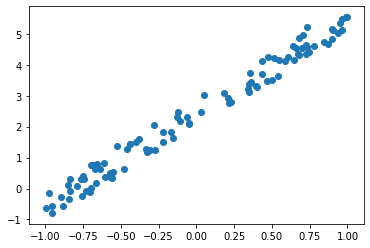

In [127]:
plt.scatter(x[:,0], y);

### Define MSE (and (re?)-discover broadcasting) 

You want to find **parameters** (weights) `a` such that you minimize the *error* between the points and the line `x@a`. Note that here `a` is unknown. For a regression problem the most common *error function* or *loss function* is the **mean squared error**. 

In [140]:
# Let's say you have a tensor:
torch.ones(5,2)

tensor([[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]])

In [144]:
# if you have a second tensor of same dimensions, you can add the two.
# what happens is that each value of the first tensor will be added to its corresponding value in the second tensor:
torch.ones(5,2) + torch.ones(5,2)

tensor([[2., 2.],
        [2., 2.],
        [2., 2.],
        [2., 2.],
        [2., 2.]])

In [146]:
# But you can also do that: 
torch.ones(5 ,2) + 3

tensor([[4., 4.],
        [4., 4.],
        [4., 4.],
        [4., 4.],
        [4., 4.]])

It's called broadcasting, what happens is that since there is only one value, pytorch (just like numpy would do) will pretend it has a tensor of corresponding dimensions filled with 3's

In [150]:
# or that:
torch.ones(5 ,2) + torch.tensor([0,4])

tensor([[1., 5.],
        [1., 5.],
        [1., 5.],
        [1., 5.],
        [1., 5.]])

In [154]:
# or that:
(torch.ones(5,2) + torch.tensor([0,1])) ** 2

# you can use that for the exercise ;) 

tensor([[1., 4.],
        [1., 4.],
        [1., 4.],
        [1., 4.],
        [1., 4.]])

In [137]:
def mse(y_preds, y_true):
    # Define a mean squared error function 
    
    return


my_actual = torch.tensor([3., 3, 3])
my_preds = torch.tensor([1.,2 ,5 ])
assert mse(my_preds, my_actual) == tensor(3.)

### Find the parameters

Create a dummy prediction tensor `a = (-2.0,2.0)`

In [175]:
a = tensor(-2., 2)

then we can compute `y_hat` which is our *prediction* 

In [176]:
y_hat = 
assert y_hat.shape == torch.Size([n])

and then compute our error.

In [171]:
from fastai.metrics import mean_squared_error
# use your function mse to compute the error
error = 


assert type(error) == torch.Tensor
assert np.round(error, 4) == np.round(mean_squared_error(y_hat, y), 4)

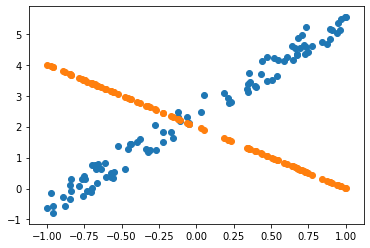

In [177]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat);

So far we have specified the *model* (linear regression) and the *evaluation criteria* (or *loss function*). Now we need to handle *optimization*; that is, how do we find the best values for `a`? How do we find the best *fitting* linear regression.

#### Gradient Descent

BAD NEWS ! in order to find the best fitting line, you need to use calculus...

GOOD NEWS ! pytorch handles all the calculus for you

when you calculate a loss with pytorch, it remembers what calculation you made and can update the parameters

In pytorch, your model will be stored in tensors, and your data will be stored in tensors. How do we tell pytorch which tensors it has to update with the loss ?

We tell pytorch that a specific tensor is a Parameter: 

In [179]:
a

tensor([-2.,  2.])

Right now, a is a regular tensor

In [ ]:
a = nn.Parameter(a); a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

Now it's a parameter. Note the "requires_grad=True". It means this tensor will get its 'share' of the loss during _grad_ient descent

In [ ]:
# make your prediction:
y_hat = 

# calculate your loss:
loss = 

# "backpropagate" the loss to your parameters:
loss.

# now you have the gradients for all parameters in a
print(a.grad)

# subtract those gradient from the original parameters
with torch.no_grad():
    
    # and reset the gradients to zero (otherwise they will accumulate... more on that later)

Now we have all the elements of our training loop. Do the same process a lot of time:

In [ ]:
# set a number of epochs:
EPOCHS = 

# write a for loop that will replicate the steps in the above cell
# for the number of epochs you have set:


In [ ]:
# And check your results ;) 
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],x@a);

Don't run this cell:

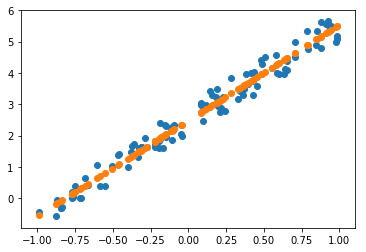

In [ ]:
# Your scatterplot should look like that:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],x@a);

# An awesome ressource to go further in your Pytorch understanding:
https://towardsdatascience.com/understanding-pytorch-with-an-example-a-step-by-step-tutorial-81fc5f8c4e8e#2e24